In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [5]:
for i in range(0, 10):
    similar = 0
    for j in range(0, 10):
        if i != j:
            x1 = raitings[i]
            x2 = raitings[j]

            cos = np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
            
            if cos > similar:
                similar = cos
                user = j + 1
            
#     print(f'На {i+1} пользователя больше всего похож пользователь {user}')
    print(f'({i+1}, {user})')

(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [6]:
rait = np.array(raitings)
U, s, V = np.linalg.svd(rait)
S = np.zeros((rait.shape[0], rait.shape[1]))
S[:rait.shape[0], :rait.shape[0]] = np.diag(s)
n_component = 5
S = S[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))

r1 = np.linalg.matrix_rank(raitings)
r2 = np.linalg.matrix_rank(A)

print('Ранг матрицы raitings:', r1)
print('Ранг сжатой матрицы:', r2)

Ранг матрицы raitings: 10
Ранг сжатой матрицы: 5


### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [7]:
from scipy.misc import derivative

def f(x):
    return (np.tan(np.sin(x) + np.cos(2*x + 3)))**2

derivative(f, 1.0, dx=1e-6)

55.3859176464222

$$ f'(x) = 2tan(sin(x) + cos(2x+3)) \times sec^2(sin(x) + cos(2x+3)) \times (cos(x) - 2sin(2x + 3)) $$
$$ f'(1) = 2tan(sin(1) + cos(5)) \times sec^2(sin(1) + cos(5)) \times (cos(1) - 2sin(5)) $$

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [9]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [10]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [11]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

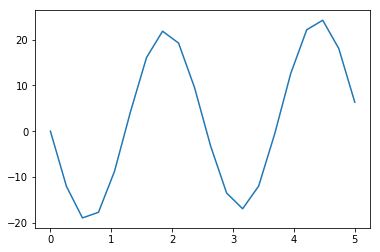

In [12]:
plt.plot(x, fx)
plt.show()

In [13]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [14]:
params = [2, -2]

res = minimize(error, params, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

res.x

Optimization terminated successfully.
         Current function value: 0.000106
         Iterations: 57
         Function evaluations: 108


array([ 3.00000022, -2.50000014])

a = 3

b = -2.5

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [34]:
from scipy.stats import *

rv = binom(20, 0.3)

In [56]:
#параметры запуска: размеры выборок и количество повторов генерации
n1 = 50
samples_count = 1000

#массивы для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # на каждом цикле генерируем выборки разных размеров
    sample1 = rv.rvs(size=n1)
    
    # считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())

Text(0.5, 0, '$x$')

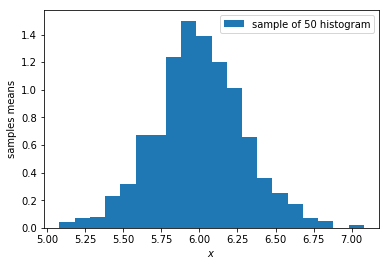

In [57]:
#строим графики
#подписи для графиков
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, bins=20, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [58]:
a = np.array([[1, 4], 
              [1, 1]])
w, v = np.linalg.eig(a)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [0.4472136 0.4472136]
